EDA Topic: PREDICT WORKFORCE REQUIREMENT USING MACHINE LEARNING ALGORITHMS AND ANALYSIS

Group Members:GROUP(9)

• Abhay Korat – 0779708 • Nishtha Vijay Mistri – 0780925 • Kuldeep Thakor – 0770272 • Ashish Thomas Alex – 0787653

In [1]:
# Import all necessary packages
%run Libraries.ipynb

In [2]:
# Loading dataset
data = pd.read_csv('F:\Semester-4\Capstone\Dataset\Dataset_1.csv')

In [3]:
#Filter dataset only after 2016
data = data[(data.REF_DATE > 2016)]

## Understanding the Data

In [4]:
# To view first five row of the dataset
data.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
841632,2017,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 years and over,Persons,249,thousands,3,v2363353,1.1.1.1.1,19530.3,NaN,NaN,NaN,1
841633,2017,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 to 24 years,Persons,249,thousands,3,v19668072,1.1.1.1.2,2829.8,NaN,NaN,NaN,1
841634,2017,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,25 to 54 years,Persons,249,thousands,3,v19668073,1.1.1.1.3,12634.6,NaN,NaN,NaN,1
841635,2017,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,55 years and over,Persons,249,thousands,3,v19668074,1.1.1.1.4,4065.8,NaN,NaN,NaN,1
841636,2017,Canada,2016A000011124,Labour force,"Total, all industries",Males,15 years and over,Persons,249,thousands,3,v2363523,1.1.1.2.1,10305.3,NaN,NaN,NaN,1


In [5]:
# To view last five row of the dataset
data.tail()

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
953827,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Males,55 years and over,Percentage,242,units,0,v19684898,11.6.28.2.4,NaN,x,NaN,NaN,1
953828,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,15 years and over,Percentage,242,units,0,v2368960,11.6.28.3.1,NaN,x,NaN,NaN,1
953829,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,15 to 24 years,Percentage,242,units,0,v19684899,11.6.28.3.2,NaN,x,NaN,NaN,1
953830,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,25 to 54 years,Percentage,242,units,0,v19684900,11.6.28.3.3,NaN,x,NaN,NaN,1
953831,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,55 years and over,Percentage,242,units,0,v19684901,11.6.28.3.4,NaN,x,NaN,NaN,1


In [6]:
# To display count of row and columns
data.shape

(112200, 18)

In [7]:
# To view statistics of the dataset
data.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,112200.00000,112200.000000,112200.000000,79676.000000,0.0,0.0,112200.0
mean,2019.00000,247.847059,2.505882,97.589344,NaN,NaN,1.0
std,1.41422,2.596416,1.112750,542.451302,NaN,NaN,0.0
min,2017.00000,242.000000,0.000000,0.200000,NaN,NaN,1.0
25%,2018.00000,249.000000,3.000000,2.700000,NaN,NaN,1.0
50%,2019.00000,249.000000,3.000000,8.100000,NaN,NaN,1.0
75%,2020.00000,249.000000,3.000000,34.100000,NaN,NaN,1.0
max,2021.00000,249.000000,3.000000,20385.300000,NaN,NaN,1.0


In [8]:
# To Display feature names
data.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Labour force characteristics',
       'North American Industry Classification System (NAICS)', 'Sex',
       'Age group', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [9]:
# Removing irrelevant columns from data
data1 = data.drop(['TERMINATED','SYMBOL','DGUID','UOM','UOM_ID','COORDINATE','VECTOR','SCALAR_FACTOR','SCALAR_ID','STATUS','DECIMALS'],axis=1)

In [10]:
# Data types of 'data1'
data1.dtypes

REF_DATE                                                   int64
GEO                                                       object
Labour force characteristics                              object
North American Industry Classification System (NAICS)     object
Sex                                                       object
Age group                                                 object
VALUE                                                    float64
dtype: object

In [11]:
# Checking no. of columns and rows of dataset
data1.shape

(112200, 7)

In [12]:
# Checking for null values
data1.isnull().sum()

REF_DATE                                                     0
GEO                                                          0
Labour force characteristics                                 0
North American Industry Classification System (NAICS)        0
Sex                                                          0
Age group                                                    0
VALUE                                                    32524
dtype: int64

In [13]:
# Removing null values 
data2 = data1.dropna(how='any',axis=0)

In [14]:
# After removing null values
data2.isnull().sum()

REF_DATE                                                 0
GEO                                                      0
Labour force characteristics                             0
North American Industry Classification System (NAICS)    0
Sex                                                      0
Age group                                                0
VALUE                                                    0
dtype: int64

In [15]:
# Checking no. of rows and cloumns
data2.shape

(79676, 7)

In [16]:
# Checking for unique values in data
data2.nunique()

REF_DATE                                                    5
GEO                                                        11
Labour force characteristics                                6
North American Industry Classification System (NAICS)      29
Sex                                                         3
Age group                                                   4
VALUE                                                    6582
dtype: int64

In [17]:
# Rename freatures
data2 = data2.rename(columns={'Labour force characteristics': 'Labour_characteristics', 'North American Industry Classification System (NAICS)':'NAICS'})
data2 = data2.replace('Full-time employment','Full-time').replace('Part-time employment','Part-time')

In [18]:
# Remove Rate of unemployment as we already have unemployment count
data2 = data2[data2['Labour_characteristics'] != 'Unemployment rate']

In [19]:
# Ordinal encoding For Categorical Value 
Ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col':'Labour_characteristics', 'mapping':{'Unemployment':0, 'Employment':1, 'Full-time':2, 'Labour force':3, 'Part-time':4}},
                                                 {'col':'Sex', 'mapping':{'Both sexes':0, 'Males':1, 'Females':2}},
                                                 {'col':'Age group', 'mapping':{'15 years and over':0, '15 to 24 years':1, '25 to 54 years':2, '55 years and over':3}}])

Ordinal_encoder.fit(data2)
data3 = Ordinal_encoder.transform(data2)

data3

,REF_DATE,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE
841632,2017,Canada,3,"Total, all industries",0,0,19530.3
841633,2017,Canada,3,"Total, all industries",0,1,2829.8
841634,2017,Canada,3,"Total, all industries",0,2,12634.6
841635,2017,Canada,3,"Total, all industries",0,3,4065.8
841636,2017,Canada,3,"Total, all industries",1,0,10305.3
...,...,...,...,...,...,...,...
953491,2021,British Columbia,0,Unclassified industries,1,3,10.9
953492,2021,British Columbia,0,Unclassified industries,2,0,43.5
953493,2021,British Columbia,0,Unclassified industries,2,1,11.9
953494,2021,British Columbia,0,Unclassified industries,2,2,20.5


In [20]:
# Change data type to category for GEO and NAICS features
data3['GEO'] = data3['GEO'].astype('category')
data3['NAICS'] = data3['NAICS'].astype('category')

In [21]:
# creating instance of labelencoder
labelencoder = LabelEncoder()


# Assigning numerical values and storing in another column
data3['GEO_Cat'] = labelencoder.fit_transform(data3['GEO'])
data3['NAICS_Cat'] = labelencoder.fit_transform(data3['NAICS'])

data2

,REF_DATE,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE
841632,2017,Canada,Labour force,"Total, all industries",Both sexes,15 years and over,19530.3
841633,2017,Canada,Labour force,"Total, all industries",Both sexes,15 to 24 years,2829.8
841634,2017,Canada,Labour force,"Total, all industries",Both sexes,25 to 54 years,12634.6
841635,2017,Canada,Labour force,"Total, all industries",Both sexes,55 years and over,4065.8
841636,2017,Canada,Labour force,"Total, all industries",Males,15 years and over,10305.3
...,...,...,...,...,...,...,...
953491,2021,British Columbia,Unemployment,Unclassified industries,Males,55 years and over,10.9
953492,2021,British Columbia,Unemployment,Unclassified industries,Females,15 years and over,43.5
953493,2021,British Columbia,Unemployment,Unclassified industries,Females,15 to 24 years,11.9
953494,2021,British Columbia,Unemployment,Unclassified industries,Females,25 to 54 years,20.5


In [22]:
# Create new dataframe for before pandemic 
Before_Pandemic = data3[(data3.REF_DATE >= 2017) & (data3.REF_DATE <= 2019)]

Before_Pandemic

,REF_DATE,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
841632,2017,Canada,3,"Total, all industries",0,0,19530.3,2,23
841633,2017,Canada,3,"Total, all industries",0,1,2829.8,2,23
841634,2017,Canada,3,"Total, all industries",0,2,12634.6,2,23
841635,2017,Canada,3,"Total, all industries",0,3,4065.8,2,23
841636,2017,Canada,3,"Total, all industries",1,0,10305.3,2,23
...,...,...,...,...,...,...,...,...,...
908611,2019,British Columbia,0,Unclassified industries,1,3,6.0,1,25
908612,2019,British Columbia,0,Unclassified industries,2,0,25.3,1,25
908613,2019,British Columbia,0,Unclassified industries,2,1,6.3,1,25
908614,2019,British Columbia,0,Unclassified industries,2,2,15.4,1,25


In [23]:
# Create new dataframe for During pandemic
During_Pandemic = data3[(data3.REF_DATE > 2019) & (data3.REF_DATE <= 2021)]

During_Pandemic

,REF_DATE,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
908952,2020,Canada,3,"Total, all industries",0,0,19896.6,2,23
908953,2020,Canada,3,"Total, all industries",0,1,2775.5,2,23
908954,2020,Canada,3,"Total, all industries",0,2,12807.8,2,23
908955,2020,Canada,3,"Total, all industries",0,3,4313.3,2,23
908956,2020,Canada,3,"Total, all industries",1,0,10534.8,2,23
...,...,...,...,...,...,...,...,...,...
953491,2021,British Columbia,0,Unclassified industries,1,3,10.9,1,25
953492,2021,British Columbia,0,Unclassified industries,2,0,43.5,1,25
953493,2021,British Columbia,0,Unclassified industries,2,1,11.9,1,25
953494,2021,British Columbia,0,Unclassified industries,2,2,20.5,1,25


In [24]:
# Set REF_DATE as index 
Before_Pandemic.set_index('REF_DATE', inplace=True)

During_Pandemic.set_index('REF_DATE', inplace=True)

Before_Pandemic

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2017,Canada,3,"Total, all industries",0,0,19530.3,2,23
2017,Canada,3,"Total, all industries",0,1,2829.8,2,23
2017,Canada,3,"Total, all industries",0,2,12634.6,2,23
2017,Canada,3,"Total, all industries",0,3,4065.8,2,23
2017,Canada,3,"Total, all industries",1,0,10305.3,2,23
...,...,...,...,...,...,...,...,...
2019,British Columbia,0,Unclassified industries,1,3,6.0,1,25
2019,British Columbia,0,Unclassified industries,2,0,25.3,1,25
2019,British Columbia,0,Unclassified industries,2,1,6.3,1,25


<AxesSubplot:xlabel='Sex', ylabel='GEO'>

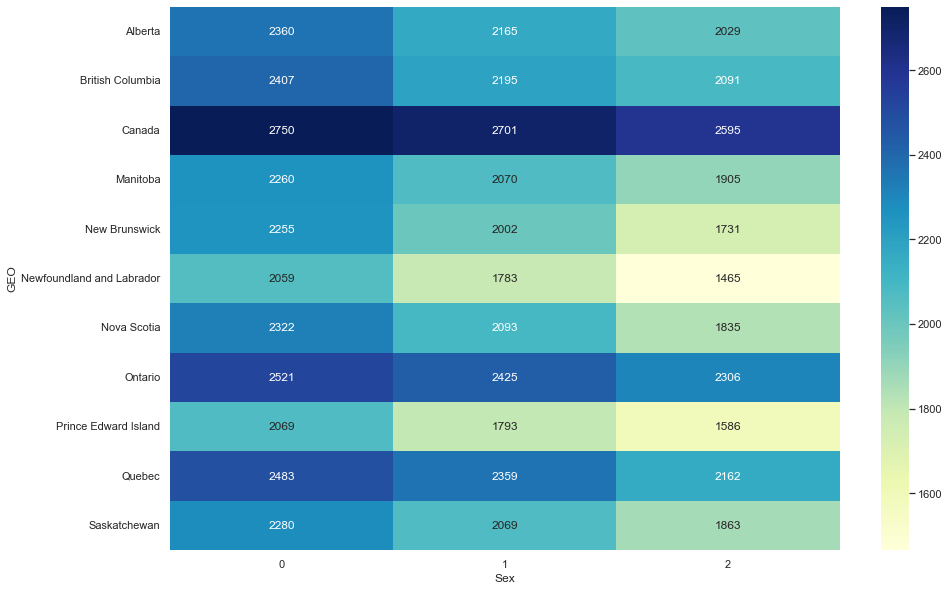

In [25]:
# Heat Map to analyze Sex category with GEO 
df_area_workout = data3.groupby(['GEO', 'Sex'])['VALUE'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='GEO', columns='Sex', values='VALUE').fillna(0)
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

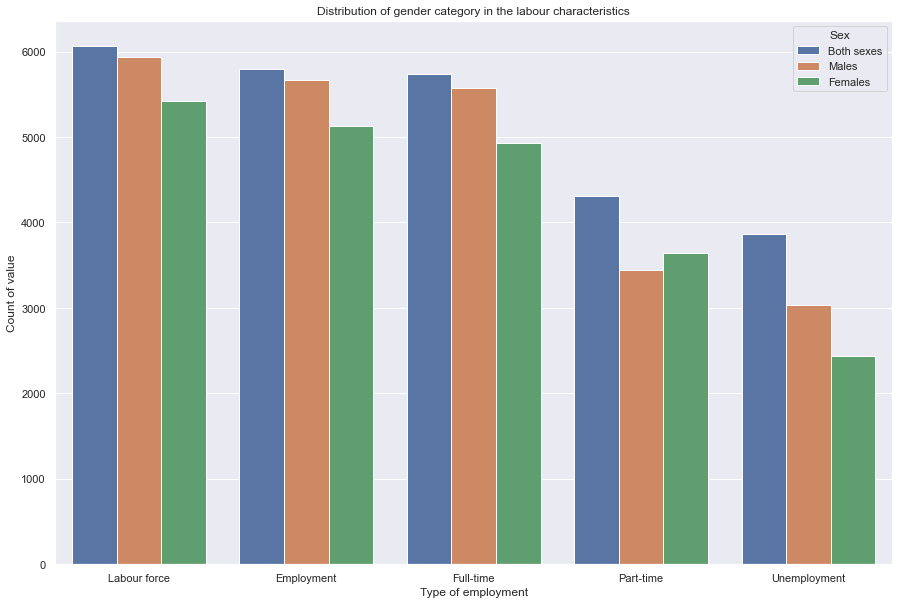

In [26]:
#Count plot of Labour characteristics 
sns.countplot(x = 'Labour_characteristics', hue = 'Sex', data=data2)
plt.xlabel('Type of employment')
plt.ylabel('Count of value')
plt.title('Distribution of gender category in the labour characteristics')
plt.show()

In [27]:
#Tablue visulization to compare sum of value by province


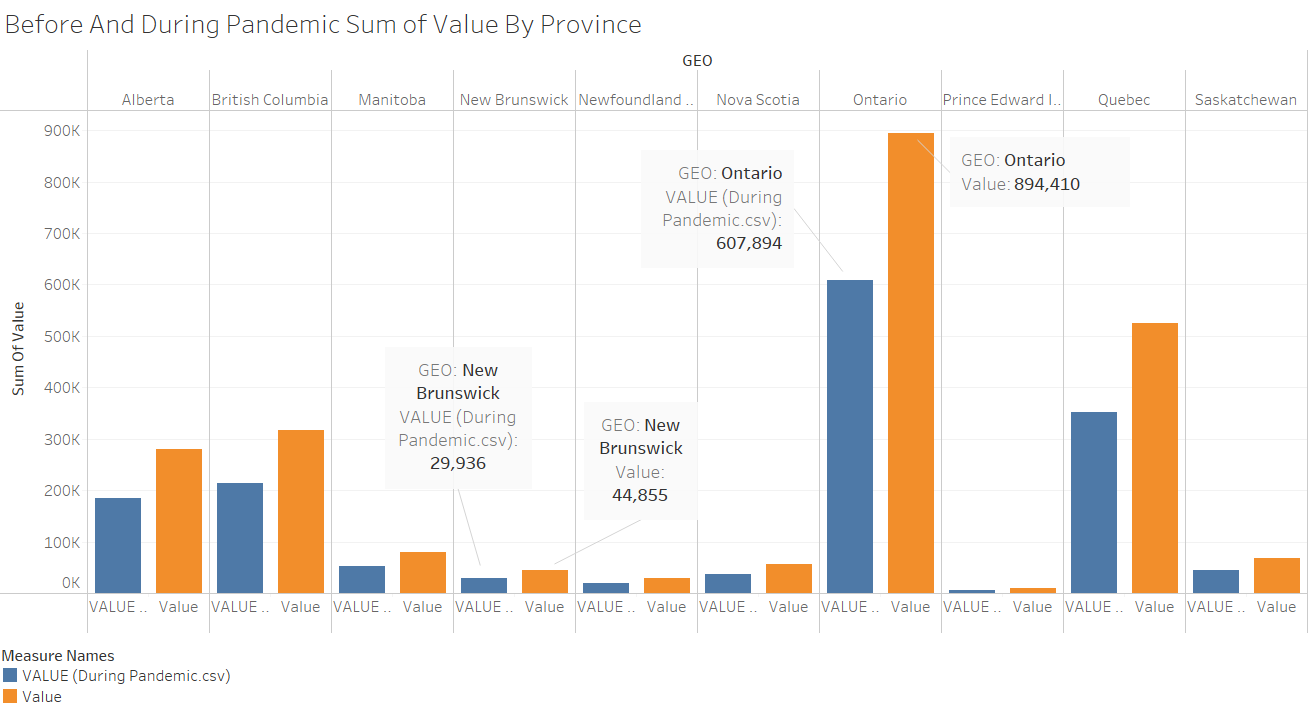